In [17]:
import pandas as pd
from datetime import datetime
import numpy as np
import os
import math as m
from pulp import *
import matplotlib.pyplot as plt

def uber_utility(W_uber, P_uber):
        
    return 14 - 1.2*W_uber - 9*(P_uber-1) 

def subway_utility(W_sub, P_sub):
    
    return 6 - 0.9*W_sub

def probability(W_uber, P_uber, W_sub, P_sub, theta):
    denom = m.exp(uber_utility(W_uber, P_uber)/theta) + m.exp(subway_utility(W_sub, P_sub)/theta)
    probability = m.exp(uber_utility(W_uber, P_uber)/theta)/denom
        
    return probability


surge = 1.5
P_uber = (12.03 - 3) * surge
P_sub = 3
theta = 2
W_sub = 7

d_1_2 = 6.86
d_1_3 = 10.78
d_2_3 = 8.56

def Get_x_ij(surge, W_sub, P_sub, theta):
    x_ij = [[0,0,0],[0,0,0],[0,0,0]]
    x_ij[0][0] = probability(0, surge, W_sub, P_sub, theta)
    x_ij[1][1] = probability(0, surge, W_sub, P_sub, theta)
    x_ij[2][2] = probability(0, surge, W_sub, P_sub, theta)

    x_ij[0][1] = probability(d_1_2, surge, W_sub, P_sub, theta)
    x_ij[1][0] = probability(d_1_2, surge, W_sub, P_sub, theta)

    x_ij[0][2] = probability(d_1_3, surge, W_sub, P_sub, theta)
    x_ij[2][0] = probability(d_1_3, surge, W_sub, P_sub, theta)

    x_ij[1][2] = probability(1.25*d_1_2, surge, W_sub, P_sub, theta)
    x_ij[2][1] = probability(1.25*d_1_2, surge, W_sub, P_sub, theta)
    return x_ij

In [24]:
#no reallocation
# model 2
x = []
y = []
OptimalOutput =0
for z in range(100):
# ========= SET-UP =========== #
    NUM_AREA = 3
    R = 13.54 # Revenue
    S = 1.5 # Multiplier
    alpha = 0.01*z
    
    # ========== DATA ============= #
    x_ij= Get_x_ij(surge, W_sub, P_sub, theta)
    c_ij = [[0, 4.146 ,999], [4.146, 0, 999],[6.51,5.18,0]] # c00, c01, c10, c11

    d_i = [100, 20,0] # d_1, d_2
    n_0i = [5, 44,10000] # n_01, n_02

    # ========= INIT LP ============ #
    prob = LpProblem("Model", LpMaximize)

    m_ij = [[0]*NUM_AREA for _ in range(NUM_AREA)]
    y_ij = [[0]*NUM_AREA for _ in range(NUM_AREA)]
    n_1i = []
    for i in range(NUM_AREA):
        n_1i.append(LpVariable("n_1%d"%(i), 0, None, LpInteger))
        for j in range(NUM_AREA):
            y_ij[i][j] = LpVariable("y_%d%d"%(i,j), 0, None, LpInteger)
            if i!=j:
                m_ij[i][j] = LpVariable("m_%d%d"%(i,j), 0, None, LpInteger)

    # ========= CONSTRUCT LP ============ #

    # Objective
    prob += sum([alpha*S*R*y_ij[i][j]*x_ij[i][j] - (1-alpha)*m_ij[i][j]*c_ij[i][j] for i in range(NUM_AREA) for j in range(NUM_AREA)])

    # Subject To
    for j in range(NUM_AREA):
        # n_1i
        prob += n_1i[j] == n_0i[j] + sum(m_ij[i][j] for i in range(NUM_AREA)) - sum(m_ij[j][i] for i in range(NUM_AREA)), "Equation Area: %d"%j
        # n_0i
        prob += n_0i[j] >= sum(m_ij[j][i] for i in range(NUM_AREA)), "Moving Constrain: %d"%j
        # y_ij
        prob += sum(y_ij[j][i] for i in range(NUM_AREA)) <= d_i[j] ,"Total Demand: %d"%j
        prob += sum(y_ij[i][j]*x_ij[i][j] for i in range(NUM_AREA)) <= n_1i[j] ,"Total Available: %d"%j


# ============== SOLVE ============= #
    print ("")
    
    prob.solve()    
    print("==========-1-1-1-1-=========")
    print("alpha =" + str(alpha))
    print("\n == Optimal Variables == \n")
    for v in prob.variables():
        if v.name == "n_10":
            print (v.name, "=", v.varValue)
            y.append(v.varValue)
    print("Objective: " ,value(prob.objective))
    x.append(alpha)
    print("==========-1-1-1-===========")
    

# iterate for x_11 probability within region 1 or 2


==========-1-1-1-1-=========
alpha =0.0

 == Optimal Variables == 

n_10 = 5.0
Objective:  0.0
==========-1-1-1-===========

==========-1-1-1-1-=========
alpha =0.01

 == Optimal Variables == 

n_10 = 5.0
Objective:  12.801463261896782
==========-1-1-1-===========

==========-1-1-1-1-=========
alpha =0.02

 == Optimal Variables == 

n_10 = 5.0
Objective:  25.602926523793563
==========-1-1-1-===========

==========-1-1-1-1-=========
alpha =0.03

 == Optimal Variables == 

n_10 = 5.0
Objective:  38.40438978569035
==========-1-1-1-===========

==========-1-1-1-1-=========
alpha =0.04

 == Optimal Variables == 

n_10 = 5.0
Objective:  51.20585304758713
==========-1-1-1-===========

==========-1-1-1-1-=========
alpha =0.05

 == Optimal Variables == 

n_10 = 5.0
Objective:  64.00731630948391
==========-1-1-1-===========

==========-1-1-1-1-=========
alpha =0.06

 == Optimal Variables == 

n_10 = 5.0
Objective:  76.8087795713807
==========-1-1-1-===========

==========-1-1-1-1-=========
alph

==========-1-1-1-1-=========
alpha =0.59

 == Optimal Variables == 

n_10 = 100.0
Objective:  1197.0166079070723
==========-1-1-1-===========

==========-1-1-1-1-=========
alpha =0.6

 == Optimal Variables == 

n_10 = 100.0
Objective:  1226.8256012614295
==========-1-1-1-===========

==========-1-1-1-1-=========
alpha =0.61

 == Optimal Variables == 

n_10 = 100.0
Objective:  1256.6345946157867
==========-1-1-1-===========

==========-1-1-1-1-=========
alpha =0.62

 == Optimal Variables == 

n_10 = 100.0
Objective:  1286.4435879701439
==========-1-1-1-===========

==========-1-1-1-1-=========
alpha =0.63

 == Optimal Variables == 

n_10 = 100.0
Objective:  1316.252581324501
==========-1-1-1-===========

==========-1-1-1-1-=========
alpha =0.64

 == Optimal Variables == 

n_10 = 100.0
Objective:  1346.0615746788583
==========-1-1-1-===========

==========-1-1-1-1-=========
alpha =0.65

 == Optimal Variables == 

n_10 = 100.0
Objective:  1375.8705680332155
==========-1-1-1-===========

=

<Container object of 3 artists>

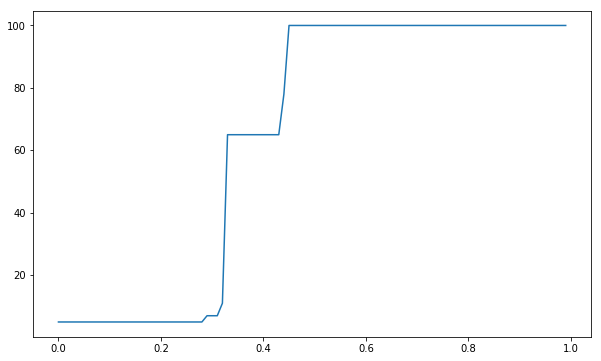

In [26]:
fig = plt.figure(figsize = (10,6))
plt.errorbar(x, y, ecolor = 'r')   